In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Análise Movie Lens

In [16]:
data = pd.read_csv(".\\introducao-a-data-science-aula0\\aula0\\ml-latest-small\\ratings.csv")
data.columns = ['usuarioID', 'filmeID', 'nota', 'momento']

In [27]:
print('Media ', data.nota.mean().round(2))
print('Desvio padrão ', data.nota.std().round(2))
print('Mediana ', data.nota.median().round(2))

Media  3.5
Desvio padrão  1.04
Mediana  3.5


<Axes: ylabel='Frequency'>

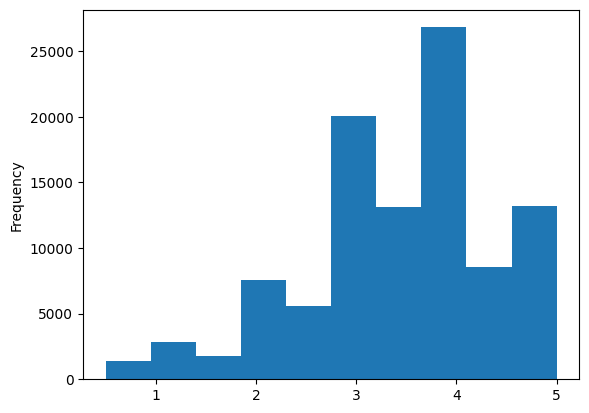

In [29]:
data.nota.plot(kind='hist')

In [31]:
data.nota.describe().round(2)

count    100836.00
mean          3.50
std           1.04
min           0.50
25%           3.00
50%           3.50
75%           4.00
max           5.00
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

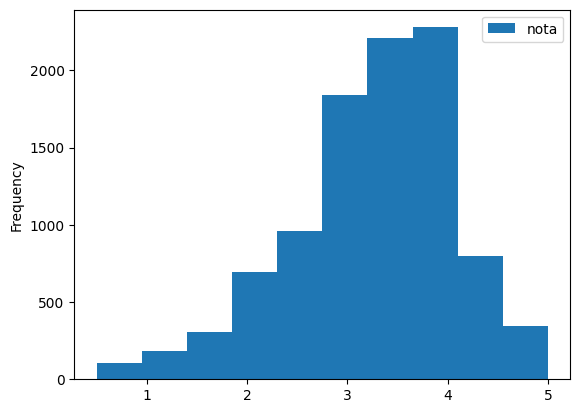

In [44]:
media_por_filme = data.groupby('filmeID')[['nota']].mean().round(2)
media_por_filme.plot(kind="hist")

<Axes: ylabel='Count'>

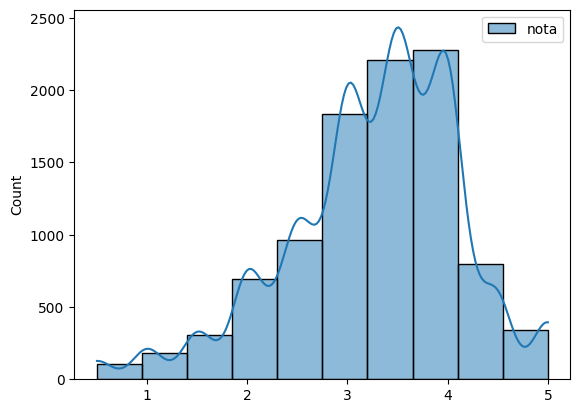

In [50]:
sns.histplot(media_por_filme, kde=True, bins=10)

<Axes: >

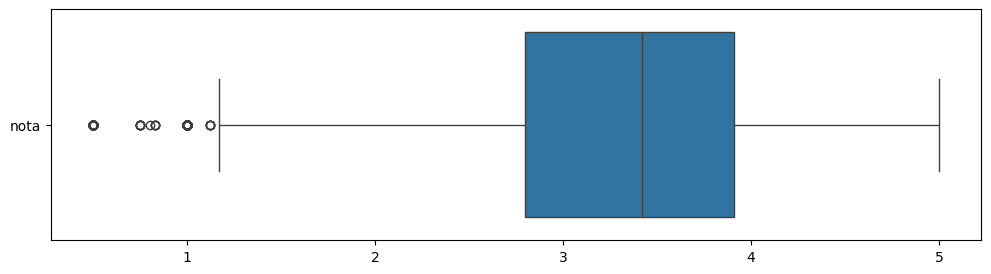

In [62]:
plt.figure(figsize=(12, 3))
sns.boxplot(media_por_filme, orient='h')

# 2. Análise iMDB

In [74]:
data_imdb = pd.read_csv(".\\introducao-a-data-science-aula0\\aula0\\ml-latest-small\\tmdb_5000_movies.csv")
contagem_idioma = data_imdb.original_language.value_counts().to_frame().reset_index()
contagem_idioma.columns = ['original_language', 'total']
contagem_idioma.head()


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

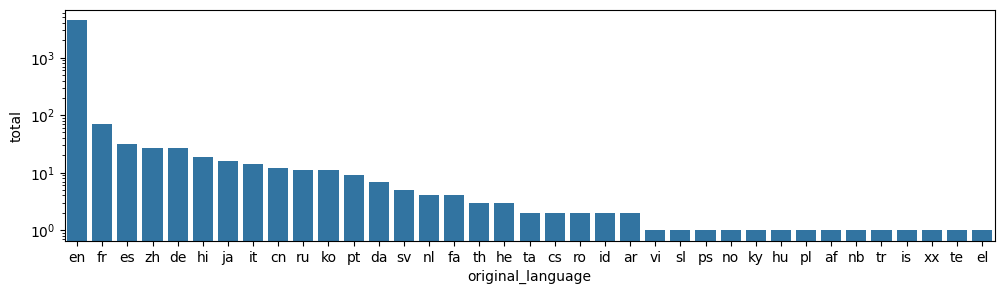

In [79]:
plt.figure(figsize=(12, 3))
plt.yscale('log')

sns.barplot(x="original_language", y="total", data = contagem_idioma)

In [99]:
total_por_lingua = data_imdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [101]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


([<matplotlib.patches.Wedge at 0x27b18eec290>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

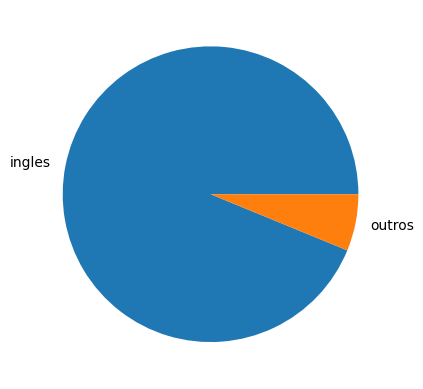

In [104]:
plt.pie(dados["total"], labels = dados["lingua"])